In [1]:
import pandas as pd
import matplotlib as plt 
import seaborn as sns

C:\Users\connor.hanan\AppData\Roaming\Python\Python311\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Gaelim/Clinic_Analysis_Pandas/master/hospital_data.csv')

In [3]:
data.head(10)

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,11/4/2019 0:00,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001
1,11/6/2019 0:00,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002
2,11/2/2019 0:00,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003
3,11/6/2019 0:00,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004
4,11/1/2019 0:00,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005
5,11/4/2019 0:00,$586.80,$-,$13.00,LOCUM,INSURANCE,OUTPATIENT,19:22:09,20:14:03,20:15:03,DR64040I4,C10006
6,11/13/2019 0:00,$570.18,$92.50,$15.00,ANCHOR,INSURANCE,OUTPATIENT,9:14:45,10:51:01,10:51:33,DR15154H4,C10007
7,11/2/2019 0:00,$493.85,$-,$30.00,FLOATING,INSURANCE,OUTPATIENT,10:35:00,10:57:26,10:57:36,DR60065B4,C10008
8,11/4/2019 0:00,$470.39,$-,$35.52,ANCHOR,HMO,OUTPATIENT,8:47:59,9:59:22,9:59:29,DR15154H4,C10009
9,11/2/2019 0:00,$468.02,$10.00,$23.91,LOCUM,HMO,OUTPATIENT,10:01:25,10:32:38,10:35:17,DR04556Z4,C10010


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    29999 non-null  object
 1    Medication Revenue     29999 non-null  object
 2     Lab Cost              29999 non-null  object
 3    Consultation Revenue   29999 non-null  object
 4   Doctor Type             29999 non-null  object
 5   Financial Class         29999 non-null  object
 6   Patient Type            29999 non-null  object
 7   Entry Time              29999 non-null  object
 8   Post-Consultation Time  29999 non-null  object
 9   Completion Time         29999 non-null  object
 10  Doctor                  29999 non-null  object
 11  Patient ID              29999 non-null  object
dtypes: object(12)
memory usage: 2.7+ MB


- Whitespace in column headers

In [5]:
data.columns = data.columns.str.strip()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    29999 non-null  object
 1   Medication Revenue      29999 non-null  object
 2   Lab Cost                29999 non-null  object
 3   Consultation Revenue    29999 non-null  object
 4   Doctor Type             29999 non-null  object
 5   Financial Class         29999 non-null  object
 6   Patient Type            29999 non-null  object
 7   Entry Time              29999 non-null  object
 8   Post-Consultation Time  29999 non-null  object
 9   Completion Time         29999 non-null  object
 10  Doctor                  29999 non-null  object
 11  Patient ID              29999 non-null  object
dtypes: object(12)
memory usage: 2.7+ MB


# Transform / Clean Data

In [6]:
def clean_values(value):
    value = value.replace('$', '')
    value = value.replace('-', '')
    value = value.replace(',', '')
    value = value.replace(' ', '')
    value = pd.to_numeric(value)
    return value

In [7]:
data['Medication Revenue'] = data['Medication Revenue'].apply(clean_values)
data['Lab Cost'] = data['Lab Cost'].apply(clean_values)
data['Consultation Revenue'] = data['Consultation Revenue'].apply(clean_values)

In [8]:
# Creating date columns and changed 'Date' from a string to a date dtype
data['Date'] = pd.to_datetime(data['Date'])
data ['Day of Week'] = data['Date'].dt.day_of_week
data ['Weekday Name'] = data['Date'].dt.strftime('%A')

In [9]:
# Creating function to get hours
def get_hour(hour):
    hour = pd.to_datetime(hour)
    hour = hour.hour
    return hour

In [10]:
# creat hour columns
data['Entry Hour'] = data['Entry Time'].apply(get_hour)
data['Post-Consultation Hour'] = data['Post-Consultation Time'].apply(get_hour)
data['Completion Hour'] = data['Completion Time'].apply(get_hour)

In [11]:
data.head(10)

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Day of Week,Weekday Name,Entry Hour,Post-Consultation Hour,Completion Hour
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001,0,Monday,8,9,9
1,2019-11-06,738.48,NaN,15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002,2,Wednesday,19,21,21
2,2019-11-02,660.00,NaN,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003,5,Saturday,10,11,12
3,2019-11-06,600.00,NaN,NaN,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004,2,Wednesday,9,10,10
4,2019-11-01,591.60,NaN,12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005,4,Friday,11,12,12
5,2019-11-04,586.80,NaN,13.00,LOCUM,INSURANCE,OUTPATIENT,19:22:09,20:14:03,20:15:03,DR64040I4,C10006,0,Monday,19,20,20
6,2019-11-13,570.18,92.5,15.00,ANCHOR,INSURANCE,OUTPATIENT,9:14:45,10:51:01,10:51:33,DR15154H4,C10007,2,Wednesday,9,10,10
7,2019-11-02,493.85,NaN,30.00,FLOATING,INSURANCE,OUTPATIENT,10:35:00,10:57:26,10:57:36,DR60065B4,C10008,5,Saturday,10,10,10
8,2019-11-04,470.39,NaN,35.52,ANCHOR,HMO,OUTPATIENT,8:47:59,9:59:22,9:59:29,DR15154H4,C10009,0,Monday,8,9,9
9,2019-11-02,468.02,10.0,23.91,LOCUM,HMO,OUTPATIENT,10:01:25,10:32:38,10:35:17,DR04556Z4,C10010,5,Saturday,10,10,10


# Data Exploration
Now I want to create a new variable, df, for manipulation and analysis

In [13]:
# In order to calc total revenue, I need to deal with the null values
df = data.fillna(0)
df['Total Revenue'] = df['Medication Revenue'] + df['Lab Cost'] + df['Consultation Revenue']

In [14]:
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Day of Week,Weekday Name,Entry Hour,Post-Consultation Hour,Completion Hour,Total Revenue
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001,0,Monday,8,9,9,1213.39
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002,2,Wednesday,19,21,21,753.48
2,2019-11-02,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003,5,Saturday,10,11,12,681.17
3,2019-11-06,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004,2,Wednesday,9,10,10,600.00
4,2019-11-01,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005,4,Friday,11,12,12,603.60


In [23]:
print(df.nunique())

Date                         13
Medication Revenue         4280
Lab Cost                    200
Consultation Revenue        241
Doctor Type                   3
Financial Class               5
Patient Type                  1
Entry Time                20629
Post-Consultation Time    21357
Completion Time           21385
Doctor                      199
Patient ID                29999
Day of Week                   7
Weekday Name                  7
Entry Hour                   17
Post-Consultation Hour       17
Completion Hour              17
Total Revenue              6660
dtype: int64


In [15]:
df.groupby('Weekday Name')['Total Revenue'].sum().sort_values(ascending=False)

Weekday Name
Monday       266648.00
Tuesday      209864.37
Friday       177569.50
Wednesday    156197.58
Saturday     124407.67
Sunday       111779.72
Thursday      97480.16
Name: Total Revenue, dtype: float64

In [24]:
df.groupby('Doctor Type')['Total Revenue'].sum().sort_values(ascending=False)

Doctor Type
ANCHOR      843987.44
LOCUM       253791.65
FLOATING     46167.91
Name: Total Revenue, dtype: float64

In [25]:
df.groupby('Financial Class')['Total Revenue'].sum().sort_values(ascending=False)

Financial Class
INSURANCE    461539.69
CORPORATE    255660.08
HMO          215925.07
PRIVATE      186282.88
MEDICARE      24539.28
Name: Total Revenue, dtype: float64

# Visualize Data

<Axes: xlabel='Weekday Name', ylabel='Total Revenue'>

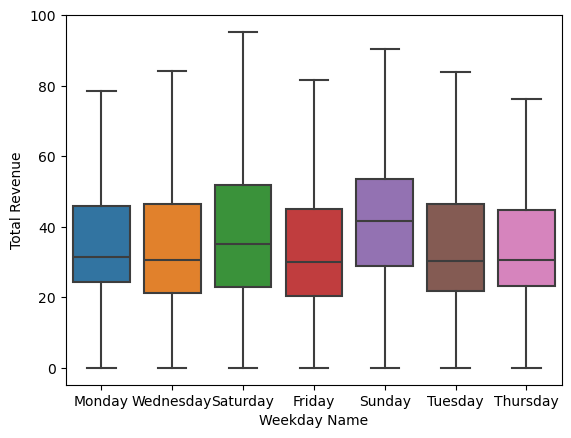

In [16]:
sns.color_palette('flare', as_cmap=True)
sns.boxplot(data=df, x='Weekday Name', y='Total Revenue', showfliers=False)

<Axes: ylabel='Entry Hour'>

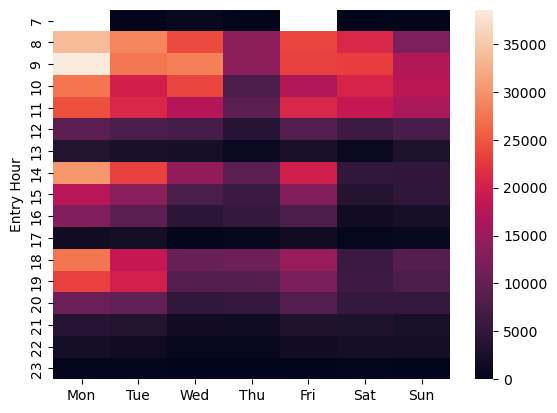

In [17]:
hmap = pd.pivot_table(data=df, index='Entry Hour', columns='Day of Week', values='Total Revenue', aggfunc='sum')
hmap.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.heatmap(hmap)

c:\Users\connor.hanan\AppData\Local\anaconda3\envs\clinic_analysis_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\connor.hanan\AppData\Local\anaconda3\envs\clinic_analysis_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\connor.hanan\AppData\Local\anaconda3\envs\clinic_analysis_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\connor.hanan\AppData\Local\anaconda3\envs\clinic_analys

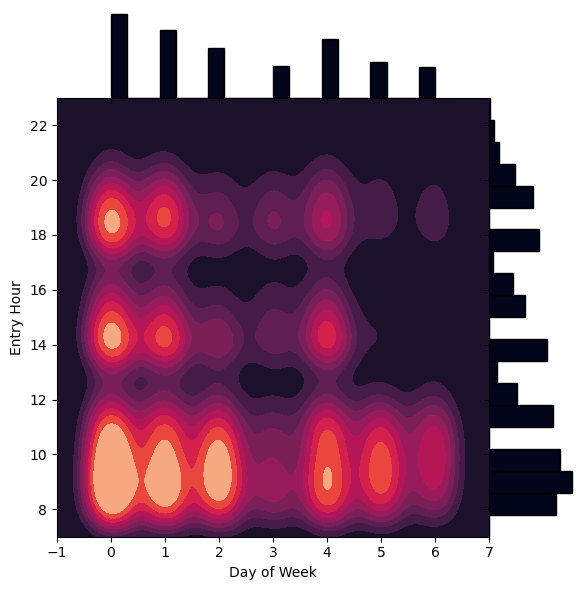

In [32]:
g  = sns.JointGrid(data=df, x='Day of Week', y='Entry Hour', space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((-1, 7), (7, 23)), #setting the clip as -1 & 7 to give us a little space on the weekdays
             thresh=0, levels=10, cmap= 'rocket')
g.plot_marginals(sns.histplot, color='#03051A', alpha=1, bins=20)

<Axes: xlabel='Financial Class'>

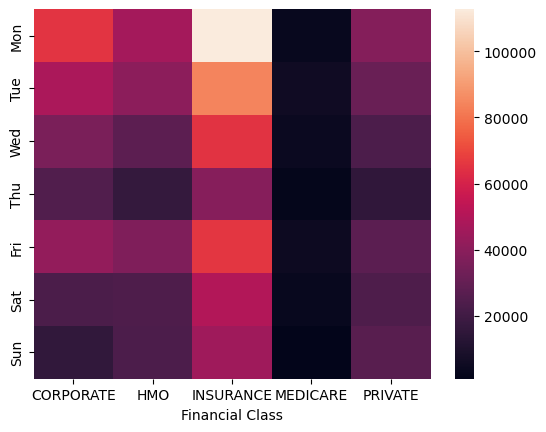

In [36]:
hmap2 = pd.pivot_table(data=df, index='Day of Week', columns='Financial Class', values='Total Revenue', aggfunc='sum')
hmap2.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.heatmap(hmap2)